# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

There are many aspects of the data that could be looked into. The following operations will be implemented:
* Importing the data into a pandas dataframe that will contain all patient information
* find average age of the patients
* return the number of males vs. females counted in the dataset
* find geographical location of the patients
* return the average yearly medical charges of the patients
* deeper Analysis in the end

We will start by importing necessary libraries and importing the Dataset and putting it into a dataframe to make our analysis easier

##### 1 - Importing the Data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

insurance = pd.read_csv('insurance.csv', encoding='utf-8')

##### 2 - Exploratory Data Analysis

Now let's get aqunaited with the data and do some initial exploratory data analysis

In [31]:
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [32]:
print(insurance.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


We have 7 columns, it looks like we have a mix of categorical and quantitave data

In [33]:
print(print(insurance.shape))

(1338, 7)
None


We have 1338 rows, let's check if we have any missing data

In [34]:
print(insurance.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


It appears we have no missing data, but we need to do deeper analysis to be sure

In [35]:
print(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Data seems to be in the right datatypes, there seems to be no missing data, and the columns have logical names, this dataset appears to be clean, and tidy, which means we can proceed with the analysis

Now let's start with some basic summary statistics

In [36]:
print(insurance.describe(include='all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

We would like to know about the sample of patients available in this dataset so let's check their age first

From the the summary statistics above we can see that the mean is 39.20 and the median is 39, which makes it seem as we have a nice sample of ages that represent a lot of patients and that will make our analysis stronger, but we need to make sure of this as sometimes the numbers alone don't shows us the full picture so let's visualize it

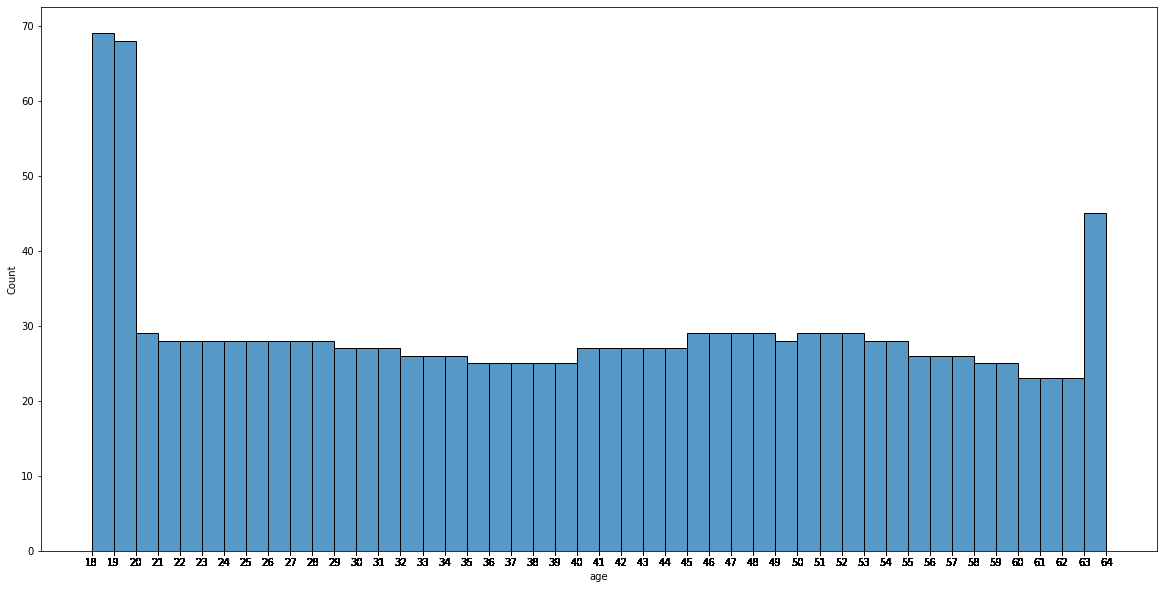

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize=(20, 10)) 
g = sns.histplot(data=insurance, x="age", bins=46)
g.set_xticks(insurance['age'])
plt.show()
plt.clf()

We can see that we have a large number of patients aged 18 and 19, nearly close to 70 each, after that the third place go to the patients age 64, while all the rest of the age group are under 30 and are quite close to each other

The average age is around 39 so despite the fact that the distribution is skewed, this is surely due to the large number of age groups available for analysis, we still have the mean very close to the median, but the visualization always shows us more than just looking at numbers

Now let's check the different amount of the males versus female patients

In [38]:
print(insurance['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


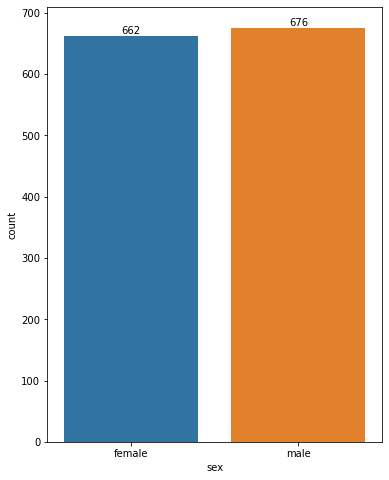

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(6, 8)) 
ax = sns.countplot(data=insurance, x="sex")
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

There is a similair amount of males and females in this dataset, there is only 14 more males which won't affect the analysis much

Now let's check the distribution of the BMI

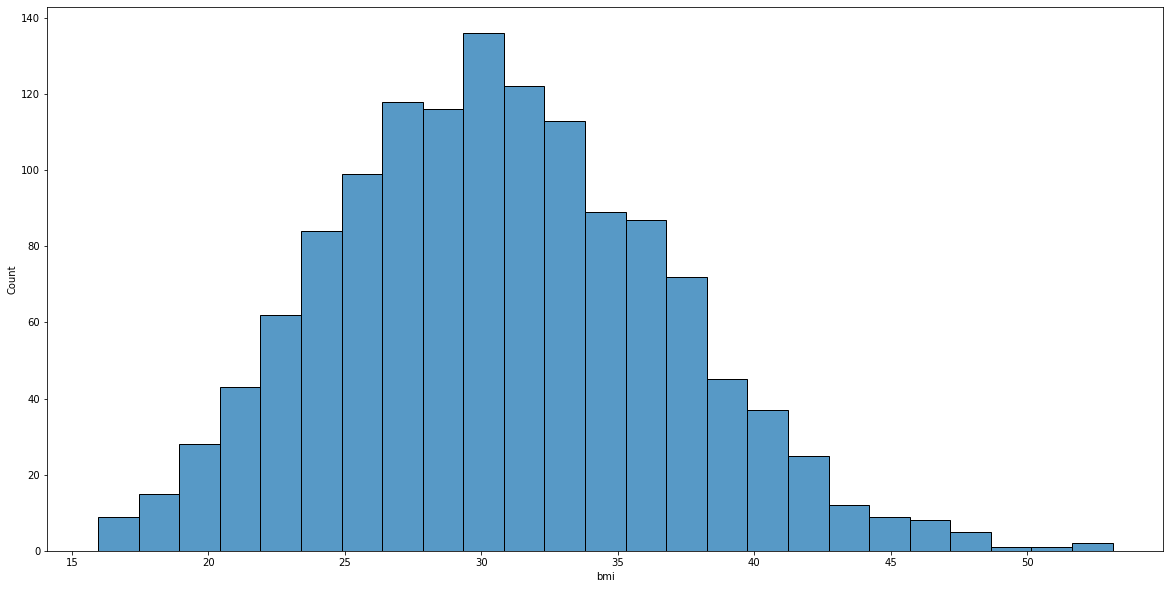

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(20, 10)) 
sns.histplot(data=insurance, x="bmi")
plt.show()
plt.clf()

the bmi is distributed in a natural way when we see the shape of the histogram but we have some outliers, some people in the dataset suffer from obesity

Now let's see check the patients with the most number of children

In [41]:
print(insurance['children'].value_counts())

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


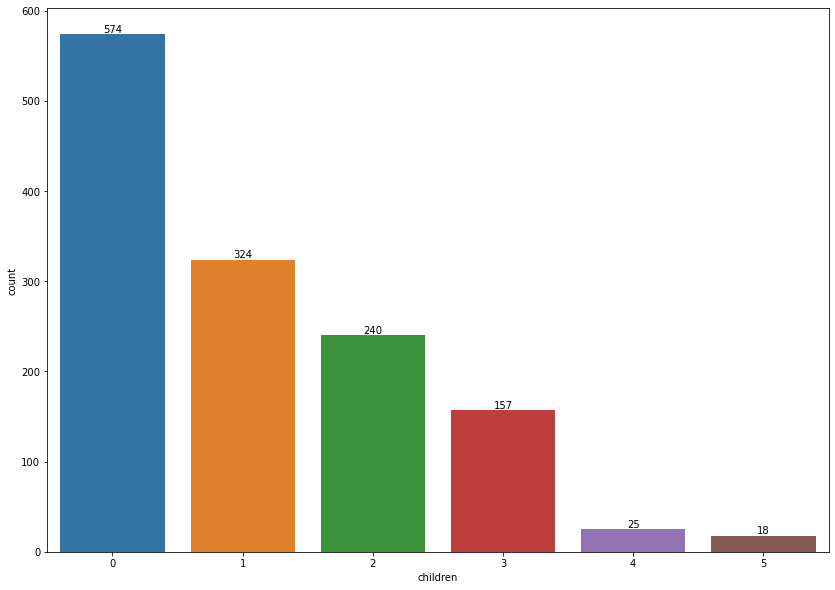

<Figure size 432x288 with 0 Axes>

In [81]:
plt.figure(figsize=(14, 10)) 
ax = sns.countplot(data=insurance, x="children")
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The number of childless patient is much larger than having at least one kid, with having 4 and 5 being much smaller, but if we compare the patients with no kids to the patients with kids regardless to the number of children, we get this:

In [43]:
pat_without_kid = insurance[insurance['children'] == 0]
pat_with_kid = insurance[insurance['children'] > 0]

print('The number of patients without kids is ' + str(pat_without_kid['children'].count()))
print('The number of patients with kids is ' + str(pat_with_kid['children'].count()))


The number of patients without kids is 574
The number of patients with kids is 764


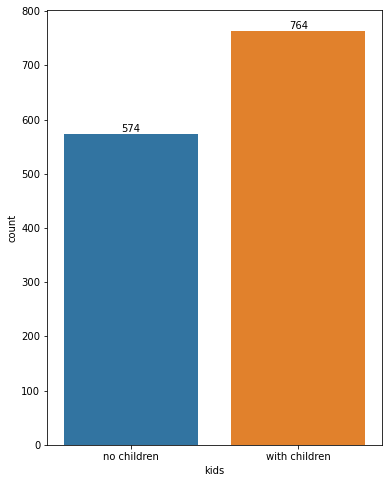

<Figure size 432x288 with 0 Axes>

In [82]:
insurance_children = insurance
insurance_children['kids'] = insurance['children'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(6, 8)) 
ax = sns.countplot(data=insurance_children, x="kids")
ax.bar_label(ax.containers[0])
ax.set(xticklabels = ('no children', 'with children'))
plt.show()
plt.clf()

The number of patients with children are higher in this dataset with 764 patient compared to 574 patient without children

Now we check the number of smokers and we plot the visualization

In [45]:
print(insurance['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


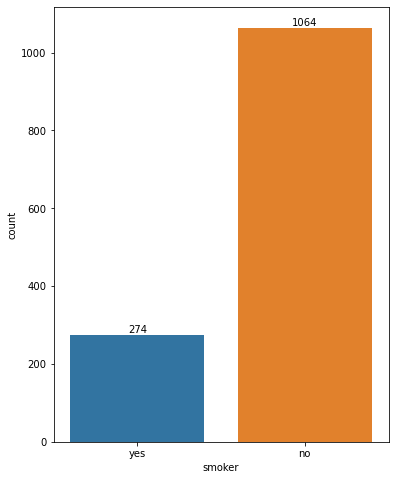

<Figure size 432x288 with 0 Axes>

In [83]:
plt.figure(figsize=(6, 8)) 
ax = sns.countplot(data=insurance, x="smoker")
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The majority of patients are non-smokers with their number being 1064, compared to the 274 smoking patients

Now we want to know the geographical location of the patients

In [47]:
print(insurance['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


There are 4 regions, and these are in the United States

let's check the number of patients in each region

In [48]:
print(insurance['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


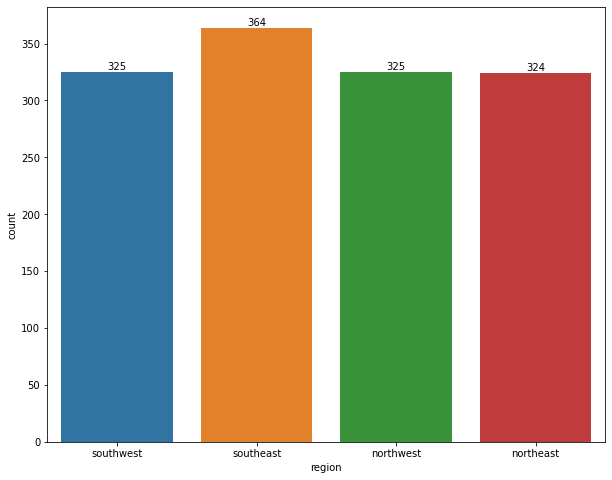

<Figure size 432x288 with 0 Axes>

In [86]:
plt.figure(figsize=(10, 8)) 
ax = sns.countplot(data=insurance, x="region")
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The patients are evenly distrubuted in the 4 regions of the United states, with the southeast having slightly more patients than the rest but the difference is rather small

Now finally let's find the average yearly charges of the patients

In [50]:
yearly_average = insurance['charges'].mean()

print('The average yearly charges of the patients is ' + str(round(yearly_average, 2)) + ' USD')

The average yearly charges of the patients is 13270.42 USD


##### 3 - More Analysis

Now let's dive deeper into the analysis, starting with the difference in the average yearly charges between males and females

In [51]:
print(insurance.groupby('sex').charges.mean())

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


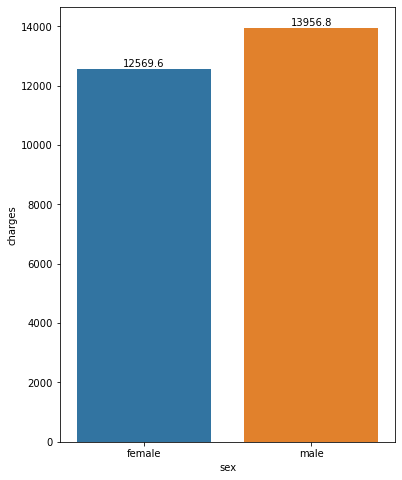

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(6, 8)) 
ax = sns.barplot(data=insurance, x="sex", y="charges", ci=None)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The average yearly charges for males are a big higher than the female but not but much, so we can proceed in the analysis as we will just consider all the patients, both males and females

Now let's check for the average yearly charges for smokers and non-smokers

In [53]:
print(insurance.groupby('smoker').charges.mean())

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


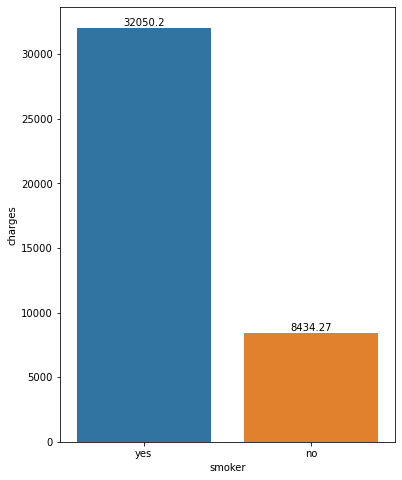

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(6, 8)) 
ax = sns.barplot(data=insurance, x="smoker", y="charges", ci=None)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

There is a large difference between the average yearly charges of smokers versus non-smokers, which means that quitting smoking will lower the insurance costs by a lot

Now let's see if having children makes a difference in the cost of insurance, we will start with all the number of children available to the patients and than we will finish it with the patients without children versus patients with children

In [61]:
print(insurance.groupby('children').charges.mean())

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


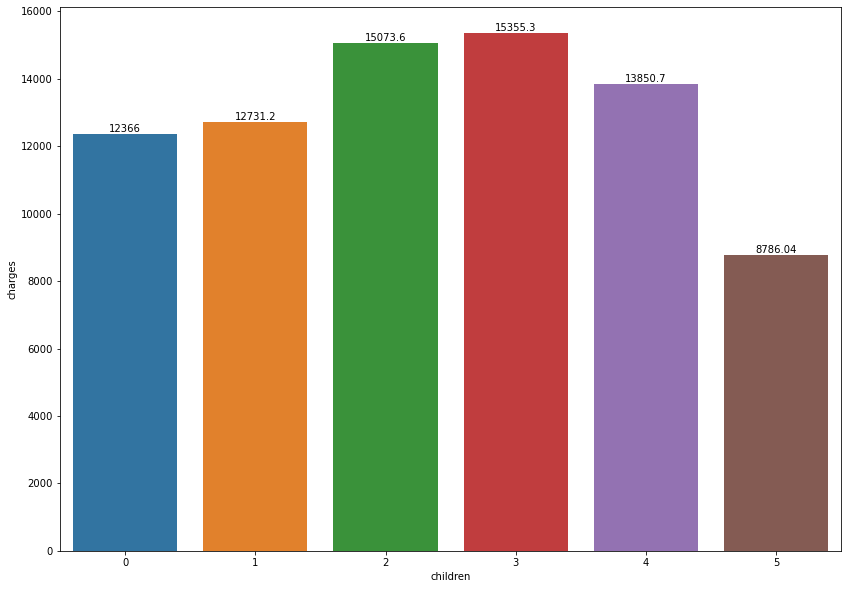

<Figure size 432x288 with 0 Axes>

In [89]:
plt.figure(figsize=(14, 10)) 
ax = sns.barplot(data=insurance, x="children", y="charges", ci=None)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

The average yearly cost of insurance while having 2 or 3 children is the highest, followed by 4 children, while having 1 or no children is nearly the same and comes after that, and finally having 5 children makes the cost lower which is interesting

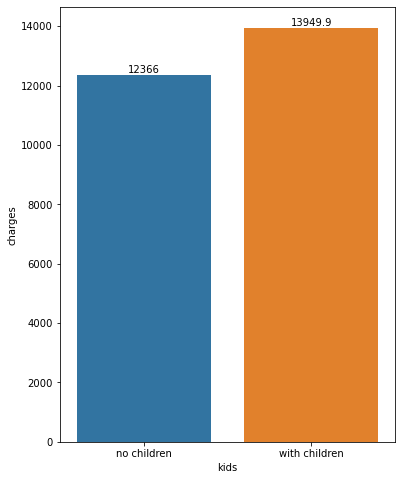

<Figure size 432x288 with 0 Axes>

In [70]:
plt.figure(figsize=(6, 8)) 
ax = sns.barplot(data=insurance_children, x="kids", y="charges", ci=None)
ax.bar_label(ax.containers[0])
ax.set(xticklabels = ('no children', 'with children'))
plt.show()
plt.clf()

In general the average yearly medical charges costs more for people with children compared to people without charges but not by much

Let's see if the being from a different geographical location makes too much difference in the insurance costs

In [90]:
print(insurance.groupby('region').charges.mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


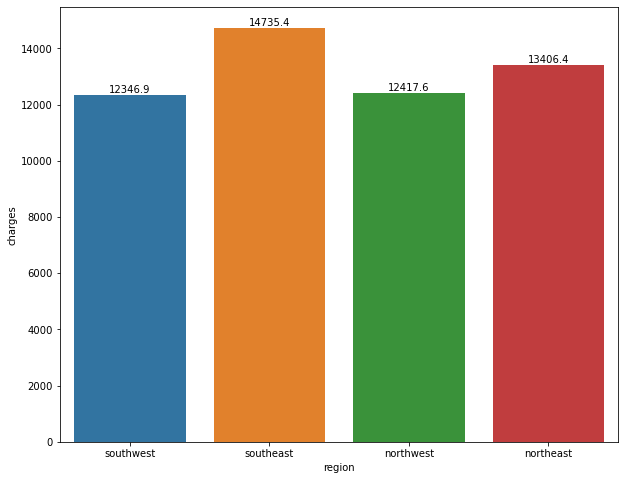

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(data=insurance, x="region", y="charges", ci=None)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

the difference is too great, patients from the souhteast have slightly a higher cost of insuance but than again there are slightly more people from that region, although the northeast region costs a bit higher than the northwest and southwest despite having the same number of patients in all of these 3 regions

Now finally let's see if Age and Bmi play a big role in having a higher or lower insurance cost, let's plot 2 scatterplots to check that, starting with the age

In [94]:
print(insurance.groupby('age').charges.mean())

age
18     7086.217556
19     9747.909335
20    10159.697736
21     4730.464330
22    10012.932802
23    12419.820040
24    10648.015962
25     9838.365311
26     6133.825309
27    12184.701721
28     9069.187564
29    10430.158727
30    12719.110358
31    10196.980573
32     9220.300291
33    12351.532987
34    11613.528121
35    11307.182031
36    12204.476138
37    18019.911877
38     8102.733674
39    11778.242945
40    11772.251310
41     9653.745650
42    13061.038669
43    19267.278653
44    15859.396587
45    14830.199856
46    14342.590639
47    17653.999593
48    14632.500445
49    12696.006264
50    15663.003301
51    15682.255867
52    18256.269719
53    16020.930755
54    18758.546475
55    16164.545488
56    15025.515837
57    16447.185250
58    13878.928112
59    18895.869532
60    21979.418507
61    22024.457609
62    19163.856573
63    19884.998461
64    23275.530837
Name: charges, dtype: float64


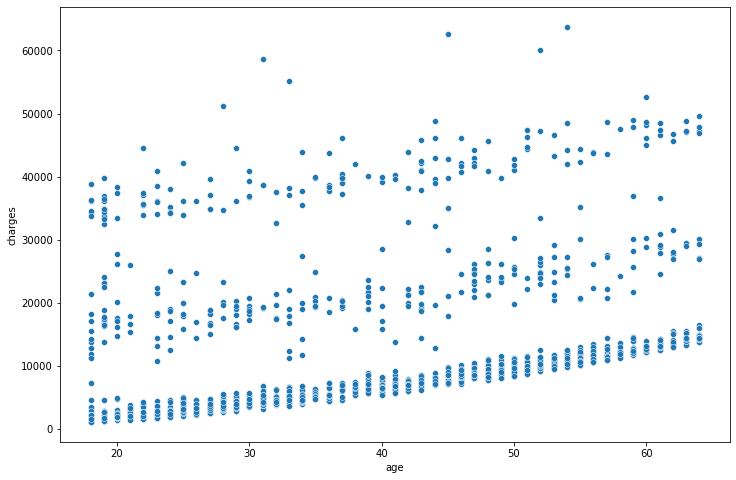

<Figure size 432x288 with 0 Axes>

In [100]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x="age", y="charges")
plt.show()
plt.clf()

We clearly see that the scatterplot goes up the more it goes to the right which means that yes, typically the older the patient the higher the insurance costs, also we have a lot of points near the buttom and some near the top, probably the smokers and non-smokers, to be sure, let's plot another scatterplot

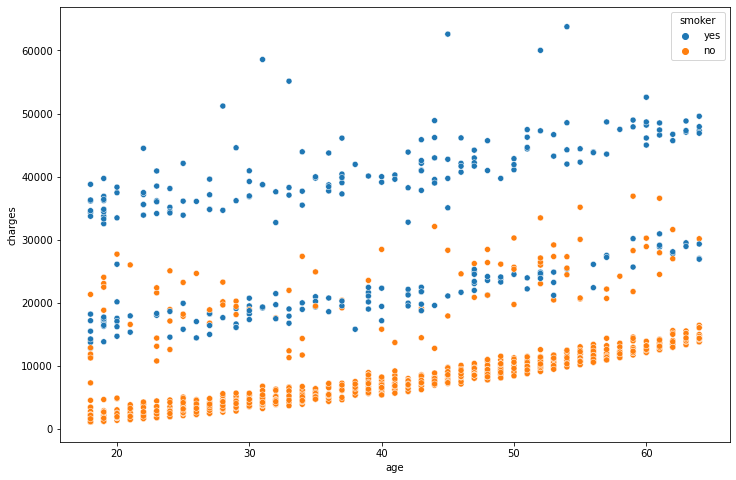

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x="age", y="charges", hue='smoker')
plt.show()
plt.clf()

Yes as we can see, the majority of the ones in the buttom are non-smokers, while the smokers have much higher insurance costs

Now let's do the same visualizations but with bmi this time

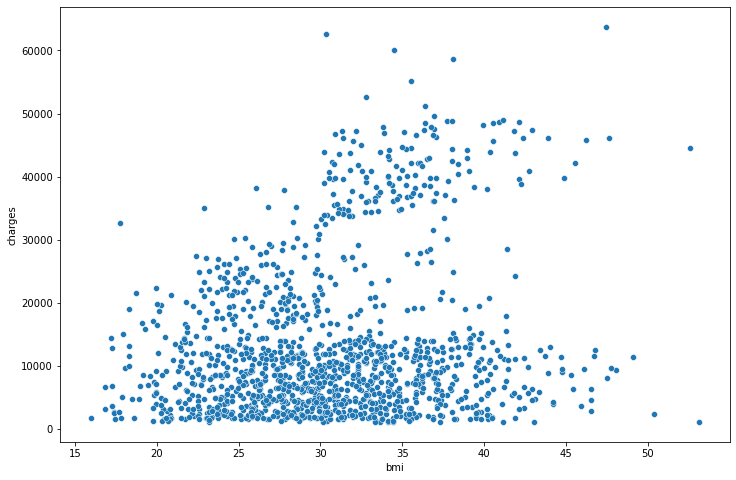

<Figure size 432x288 with 0 Axes>

In [108]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x="bmi", y="charges")
plt.show()
plt.clf()

the Bmi doesn't seem to affect the insurance costs that much, we have some outliers but these might be because of the smokers, let's plot another graph to be sure

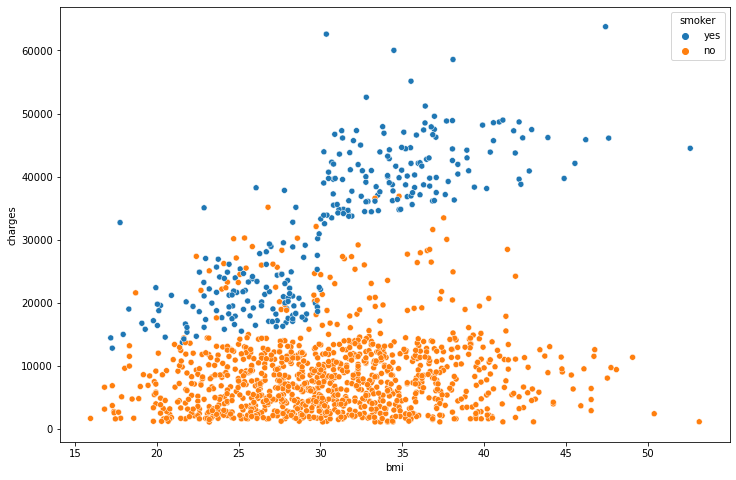

<Figure size 432x288 with 0 Axes>

In [109]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=insurance, x="bmi", y="charges", hue='smoker')
plt.show()
plt.clf()

Yes as we can see, the patients with high insurance costs are mainly the smokers, otherwise the bmi doens't affect the charges that much, unlike the age

##### 4 - Conclusion

We have learned a lot while analysis this dataset, we imported the data and put it into a pandas dataframe, we got aquainted with the data, did some summary statistics on it as well as some Exploratory Data Analysis, and then we delved deeper into it and got some insights from it

So basically biggest factor the makes the yearly insurance charges for a patient is smoking, a patient that smokes has a much higher insurance costs than a patient that doesn't smoke

Having kids plays a role as well but not by much, in average, patients without kids pay less than those with children, although patients with more than 4 kids actually pays less, but in general the average insurance costs of patients without kids is lower than those with them

The age of the patient also plays a role, as in general older patients tend to pay more, there are some outliers but they don't change the average that much

The bmi doesn't play a role in the insurance costs, as well as the geographical location, patients from all of the 4 regions have nearly similair costs with the difference between small, and we can add the sex of the patient to this as well, although the male patients pay a bit more, the difference is not significant

We have the dataset inside a pandas dataframe ready for more analysis whenever we need to do more in the future.